In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [2]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

In [3]:
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [4]:
df1 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_1.csv')
df2 = pd.read_csv('./MovementAAL/dataset/MovementAAL_RSS_2.csv')

In [5]:
df1.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.90476,-0.48,0.28571,0.30
1,-0.57143,-0.32,0.14286,0.30
2,-0.38095,-0.28,-0.14286,0.35
3,-0.28571,-0.20,-0.47619,0.35
4,-0.14286,-0.20,0.14286,-0.20


In [6]:
df2.head()

,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4
0,-0.57143,-0.20,0.71429,0.50
1,-0.76190,-0.48,0.76190,-0.25
2,-0.85714,-0.60,0.85714,0.55
3,-0.76190,-0.40,0.71429,0.60
4,-0.76190,-0.84,0.85714,0.45


In [7]:
df1.shape

(27, 4)

In [8]:
df2.shape

(26, 4)

In [9]:
path = './MovementAAL/dataset/MovementAAL_RSS_'
sequences = list()
for i in range(1,315):
    file_path = path + str(i) + '.csv'
    print(file_path)
    df = pd.read_csv(file_path, header=0)
    values = df.values
    sequences.append(values)

./MovementAAL/dataset/MovementAAL_RSS_1.csv
./MovementAAL/dataset/MovementAAL_RSS_2.csv
./MovementAAL/dataset/MovementAAL_RSS_3.csv
./MovementAAL/dataset/MovementAAL_RSS_4.csv
./MovementAAL/dataset/MovementAAL_RSS_5.csv
./MovementAAL/dataset/MovementAAL_RSS_6.csv
./MovementAAL/dataset/MovementAAL_RSS_7.csv
./MovementAAL/dataset/MovementAAL_RSS_8.csv
./MovementAAL/dataset/MovementAAL_RSS_9.csv
./MovementAAL/dataset/MovementAAL_RSS_10.csv
./MovementAAL/dataset/MovementAAL_RSS_11.csv
./MovementAAL/dataset/MovementAAL_RSS_12.csv
./MovementAAL/dataset/MovementAAL_RSS_13.csv
./MovementAAL/dataset/MovementAAL_RSS_14.csv
./MovementAAL/dataset/MovementAAL_RSS_15.csv
./MovementAAL/dataset/MovementAAL_RSS_16.csv
./MovementAAL/dataset/MovementAAL_RSS_17.csv
./MovementAAL/dataset/MovementAAL_RSS_18.csv
./MovementAAL/dataset/MovementAAL_RSS_19.csv
./MovementAAL/dataset/MovementAAL_RSS_20.csv
./MovementAAL/dataset/MovementAAL_RSS_21.csv
./MovementAAL/dataset/MovementAAL_RSS_22.csv
./MovementAAL/datas

./MovementAAL/dataset/MovementAAL_RSS_185.csv
./MovementAAL/dataset/MovementAAL_RSS_186.csv
./MovementAAL/dataset/MovementAAL_RSS_187.csv
./MovementAAL/dataset/MovementAAL_RSS_188.csv
./MovementAAL/dataset/MovementAAL_RSS_189.csv
./MovementAAL/dataset/MovementAAL_RSS_190.csv
./MovementAAL/dataset/MovementAAL_RSS_191.csv
./MovementAAL/dataset/MovementAAL_RSS_192.csv
./MovementAAL/dataset/MovementAAL_RSS_193.csv
./MovementAAL/dataset/MovementAAL_RSS_194.csv
./MovementAAL/dataset/MovementAAL_RSS_195.csv
./MovementAAL/dataset/MovementAAL_RSS_196.csv
./MovementAAL/dataset/MovementAAL_RSS_197.csv
./MovementAAL/dataset/MovementAAL_RSS_198.csv
./MovementAAL/dataset/MovementAAL_RSS_199.csv
./MovementAAL/dataset/MovementAAL_RSS_200.csv
./MovementAAL/dataset/MovementAAL_RSS_201.csv
./MovementAAL/dataset/MovementAAL_RSS_202.csv
./MovementAAL/dataset/MovementAAL_RSS_203.csv
./MovementAAL/dataset/MovementAAL_RSS_204.csv
./MovementAAL/dataset/MovementAAL_RSS_205.csv
./MovementAAL/dataset/MovementAAL_

In [10]:
len(sequences)

314

In [11]:
targets = pd.read_csv('./MovementAAL/dataset/MovementAAL_target.csv')
targets = targets.values[:,1]
targets

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [12]:
#sequences[313]

In [13]:
groups = pd.read_csv('./MovementAAL/groups/MovementAAL_DatasetGroup.csv', header=0)
groups = groups.values[:,1]

In [14]:
#groups

PRE-PROCESSING

In [15]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    314.000000
mean      42.028662
std       16.185303
min       19.000000
25%       26.000000
50%       41.000000
75%       56.000000
max      129.000000
dtype: float64

In [16]:
#Padding the sequence with the values in last row to max length
to_pad = 129
new_seq = []
for one_seq in sequences:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(4, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq = np.stack(new_seq)

#truncate the sequence to length 60
from keras.preprocessing import sequence
seq_len = 60
final_seq=sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')

In [17]:
final_seq.shape

(314, 60, 4)

In [18]:
#final_seq[0]

In [19]:
train = [final_seq[i] for i in range(len(groups)) if (groups[i]==2)]
validation = [final_seq[i] for i in range(len(groups)) if groups[i]==1]
test = [final_seq[i] for i in range(len(groups)) if groups[i]==3]

train_target = [targets[i] for i in range(len(groups)) if (groups[i]==2)]
validation_target = [targets[i] for i in range(len(groups)) if groups[i]==1]
test_target = [targets[i] for i in range(len(groups)) if groups[i]==3]

In [20]:
train = np.array(train)
validation = np.array(validation)
test = np.array(test)

train_target = np.array(train_target)
train_target = (train_target+1)/2

validation_target = np.array(validation_target)
validation_target = (validation_target+1)/2

test_target = np.array(test_target)
test_target = (test_target+1)/2

In [21]:
train.shape, validation.shape, test.shape

((106, 60, 4), (104, 60, 4), (104, 60, 4))

In [22]:
seq_len

60

# TRY1: Building time series classification model

In [23]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               267264    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 293,065
Trainable params: 293,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
adam = Adam(lr=0.01)
chk = ModelCheckpoint('best_model', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=200, batch_size=32, callbacks=[chk], validation_data=(validation,validation_target))

Epoch 1/200
4/4 [==============================] - ETA: 0s - loss: 0.6982 - accuracy: 0.4811
Epoch 00001: val_accuracy improved from -inf to 0.71154, saving model to best_model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: best_model\assets
4/4 [==============================] - 17s 4s/step - loss: 0.6982 - accuracy: 0.4811 - val_loss: 0.6505 - val_accuracy: 0.7115
Epoch 2/200
4/4 [==============================] - ETA: 0s - loss: 0.8830 - accuracy: 0.4906
Epoch 00002: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 150ms/step - loss: 0.8830 - accuracy: 0.4906 - val_loss: 0.6499 - val_accuracy: 0.6154
Epoch 3/200
4/4 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.5472
Epoch 00003: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 173ms/step - loss: 0.7618 - accuracy: 0.5472 - val_loss: 0.6203 - val_accuracy: 0.6346
Epoch 4/

Epoch 29/200
4/4 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.5566
Epoch 00029: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 168ms/step - loss: 0.6707 - accuracy: 0.5566 - val_loss: 0.7063 - val_accuracy: 0.5481
Epoch 30/200
4/4 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.5472
Epoch 00030: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 172ms/step - loss: 0.6892 - accuracy: 0.5472 - val_loss: 0.7102 - val_accuracy: 0.5385
Epoch 31/200
4/4 [==============================] - ETA: 0s - loss: 0.6878 - accuracy: 0.5283
Epoch 00031: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 322ms/step - loss: 0.6878 - accuracy: 0.5283 - val_loss: 0.7038 - val_accuracy: 0.5385
Epoch 32/200
4/4 [==============================] - ETA: 0s - loss: 0.6901 - accuracy: 0.5377
Epoch 00032: val_accuracy did not improve from 0.71154
4/4 [============

Epoch 59/200
4/4 [==============================] - ETA: 0s - loss: 1.2836 - accuracy: 0.5094
Epoch 00059: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 168ms/step - loss: 1.2836 - accuracy: 0.5094 - val_loss: 0.7650 - val_accuracy: 0.5481
Epoch 60/200
4/4 [==============================] - ETA: 0s - loss: 0.7564 - accuracy: 0.5189
Epoch 00060: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 172ms/step - loss: 0.7564 - accuracy: 0.5189 - val_loss: 0.7384 - val_accuracy: 0.4615
Epoch 61/200
4/4 [==============================] - ETA: 0s - loss: 0.6691 - accuracy: 0.5377
Epoch 00061: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 174ms/step - loss: 0.6691 - accuracy: 0.5377 - val_loss: 0.7131 - val_accuracy: 0.4135
Epoch 62/200
4/4 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.5377
Epoch 00062: val_accuracy did not improve from 0.71154
4/4 [============

Epoch 89/200
4/4 [==============================] - ETA: 0s - loss: 0.3808 - accuracy: 0.8113
Epoch 00089: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 170ms/step - loss: 0.3808 - accuracy: 0.8113 - val_loss: 1.0466 - val_accuracy: 0.5962
Epoch 90/200
4/4 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8208
Epoch 00090: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 172ms/step - loss: 0.3495 - accuracy: 0.8208 - val_loss: 1.2378 - val_accuracy: 0.5673
Epoch 91/200
4/4 [==============================] - ETA: 0s - loss: 0.8828 - accuracy: 0.6887
Epoch 00091: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 164ms/step - loss: 0.8828 - accuracy: 0.6887 - val_loss: 1.0328 - val_accuracy: 0.5192
Epoch 92/200
4/4 [==============================] - ETA: 0s - loss: 0.7042 - accuracy: 0.6132
Epoch 00092: val_accuracy did not improve from 0.71154
4/4 [============

Epoch 119/200
4/4 [==============================] - ETA: 0s - loss: 0.6972 - accuracy: 0.4906
Epoch 00119: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 179ms/step - loss: 0.6972 - accuracy: 0.4906 - val_loss: 0.7410 - val_accuracy: 0.5000
Epoch 120/200
4/4 [==============================] - ETA: 0s - loss: 0.6981 - accuracy: 0.5000
Epoch 00120: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 179ms/step - loss: 0.6981 - accuracy: 0.5000 - val_loss: 0.7296 - val_accuracy: 0.5096
Epoch 121/200
4/4 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.6038
Epoch 00121: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 178ms/step - loss: 0.6785 - accuracy: 0.6038 - val_loss: 0.7151 - val_accuracy: 0.5000
Epoch 122/200
4/4 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5660
Epoch 00122: val_accuracy did not improve from 0.71154
4/4 [========

Epoch 149/200
4/4 [==============================] - ETA: 0s - loss: 0.4178 - accuracy: 0.8302
Epoch 00149: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 170ms/step - loss: 0.4178 - accuracy: 0.8302 - val_loss: 1.6844 - val_accuracy: 0.4712
Epoch 150/200
4/4 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8019
Epoch 00150: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 171ms/step - loss: 0.4749 - accuracy: 0.8019 - val_loss: 1.7181 - val_accuracy: 0.3846
Epoch 151/200
4/4 [==============================] - ETA: 0s - loss: 0.4252 - accuracy: 0.8019
Epoch 00151: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 167ms/step - loss: 0.4252 - accuracy: 0.8019 - val_loss: 1.2389 - val_accuracy: 0.4712
Epoch 152/200
4/4 [==============================] - ETA: 0s - loss: 0.5943 - accuracy: 0.6981
Epoch 00152: val_accuracy did not improve from 0.71154
4/4 [========

Epoch 179/200
4/4 [==============================] - ETA: 0s - loss: 0.3099 - accuracy: 0.9057
Epoch 00179: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 174ms/step - loss: 0.3099 - accuracy: 0.9057 - val_loss: 1.1431 - val_accuracy: 0.6346
Epoch 180/200
4/4 [==============================] - ETA: 0s - loss: 0.2424 - accuracy: 0.9151
Epoch 00180: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 178ms/step - loss: 0.2424 - accuracy: 0.9151 - val_loss: 1.0050 - val_accuracy: 0.6250
Epoch 181/200
4/4 [==============================] - ETA: 0s - loss: 0.2509 - accuracy: 0.9057
Epoch 00181: val_accuracy did not improve from 0.71154
4/4 [==============================] - 1s 179ms/step - loss: 0.2509 - accuracy: 0.9057 - val_loss: 1.1690 - val_accuracy: 0.5673
Epoch 182/200
4/4 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9340
Epoch 00182: val_accuracy did not improve from 0.71154
4/4 [========

In [26]:
#loading the model and checking accuracy on the test data
model = load_model('best_model')

from sklearn.metrics import accuracy_score
test_preds = model.predict_classes(test)
accuracy_score(test_target, test_preds)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.47115384615384615

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(test_target, test_preds)

array([[ 4, 46],
       [ 9, 45]], dtype=int64)

In [29]:
test[0].shape

(60, 4)

In [33]:
model.save("TRY1.h5")

In [31]:
losses=pd.DataFrame(model.history.history)

In [32]:
losses.plot()

TypeError: no numeric data to plot

# TRY_2

In [82]:
seq_len=60
n_features=4
n_outputs=1
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len,n_features)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 256)               267264    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 100)               25700     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 293,065
Trainable params: 293,065
Non-trainable params: 0
_________________________________________________________________


In [83]:
verbose, epochs, batch_size = 1, 500, 20
adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
# fit network
model.fit(train, train_target, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_data=(validation, validation_target))
# evaluate model
_,accuracy = model.evaluate(test, test_target, batch_size=batch_size, verbose=0)
print(accuracy)

Epoch 1/500
6/6 [==============================] - 2s 413ms/step - loss: 0.7603 - accuracy: 0.5000 - val_loss: 0.6735 - val_accuracy: 0.6346
Epoch 2/500
6/6 [==============================] - 1s 133ms/step - loss: 0.7259 - accuracy: 0.5377 - val_loss: 0.6931 - val_accuracy: 0.5096
Epoch 3/500
6/6 [==============================] - 1s 135ms/step - loss: 0.6494 - accuracy: 0.5849 - val_loss: 0.8909 - val_accuracy: 0.6346
Epoch 4/500
6/6 [==============================] - 1s 134ms/step - loss: 0.6434 - accuracy: 0.6415 - val_loss: 0.6686 - val_accuracy: 0.5481
Epoch 5/500
6/6 [==============================] - 1s 135ms/step - loss: 0.6363 - accuracy: 0.5755 - val_loss: 0.6444 - val_accuracy: 0.5192
Epoch 6/500
6/6 [==============================] - 1s 134ms/step - loss: 0.6338 - accuracy: 0.5943 - val_loss: 0.6486 - val_accuracy: 0.6250
Epoch 7/500
6/6 [==============================] - 1s 132ms/step - loss: 0.6273 - accuracy: 0.7075 - val_loss: 0.5715 - val_accuracy: 0.7115
Epoch 8/500
6

Epoch 59/500
6/6 [==============================] - 1s 98ms/step - loss: 0.5912 - accuracy: 0.6509 - val_loss: 0.6991 - val_accuracy: 0.6154
Epoch 60/500
6/6 [==============================] - 1s 127ms/step - loss: 0.5523 - accuracy: 0.7075 - val_loss: 0.7217 - val_accuracy: 0.5481
Epoch 61/500
6/6 [==============================] - 1s 134ms/step - loss: 0.5357 - accuracy: 0.7642 - val_loss: 0.7909 - val_accuracy: 0.6058
Epoch 62/500
6/6 [==============================] - 1s 140ms/step - loss: 0.5079 - accuracy: 0.7453 - val_loss: 0.8001 - val_accuracy: 0.5577
Epoch 63/500
6/6 [==============================] - 1s 141ms/step - loss: 0.4929 - accuracy: 0.7547 - val_loss: 1.0266 - val_accuracy: 0.5769
Epoch 64/500
6/6 [==============================] - 1s 102ms/step - loss: 0.5143 - accuracy: 0.6981 - val_loss: 1.4147 - val_accuracy: 0.5769
Epoch 65/500
6/6 [==============================] - 1s 128ms/step - loss: 0.7353 - accuracy: 0.7358 - val_loss: 1.1578 - val_accuracy: 0.5096
Epoch 6

6/6 [==============================] - 1s 150ms/step - loss: 0.6912 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 174/500
6/6 [==============================] - 1s 149ms/step - loss: 0.6958 - accuracy: 0.5094 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 175/500
6/6 [==============================] - 1s 150ms/step - loss: 0.6965 - accuracy: 0.5094 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 176/500
6/6 [==============================] - 1s 145ms/step - loss: 0.6919 - accuracy: 0.5094 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 177/500
6/6 [==============================] - 1s 142ms/step - loss: 0.6989 - accuracy: 0.5094 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 178/500
6/6 [==============================] - 1s 145ms/step - loss: 0.6955 - accuracy: 0.4906 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 179/500
6/6 [==============================] - 1s 143ms/step - loss: 0.6964 - accuracy: 0.4151 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 180/500

6/6 [==============================] - 1s 146ms/step - loss: 0.6918 - accuracy: 0.5189 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 288/500
6/6 [==============================] - 1s 146ms/step - loss: 0.6933 - accuracy: 0.4906 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 289/500
6/6 [==============================] - 1s 147ms/step - loss: 0.6947 - accuracy: 0.5094 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 290/500
6/6 [==============================] - 1s 147ms/step - loss: 0.6936 - accuracy: 0.5094 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 291/500
6/6 [==============================] - 1s 146ms/step - loss: 0.6926 - accuracy: 0.5189 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 292/500
6/6 [==============================] - 1s 145ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 293/500
6/6 [==============================] - 1s 146ms/step - loss: 0.6989 - accuracy: 0.4906 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 294/500

6/6 [==============================] - 1s 146ms/step - loss: 0.6929 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 402/500
6/6 [==============================] - 1s 148ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 403/500
6/6 [==============================] - 1s 145ms/step - loss: 0.6927 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 404/500
6/6 [==============================] - 1s 150ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 405/500
6/6 [==============================] - 1s 145ms/step - loss: 0.6930 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 406/500
6/6 [==============================] - 1s 143ms/step - loss: 0.6936 - accuracy: 0.5094 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 407/500
6/6 [==============================] - 1s 146ms/step - loss: 0.6928 - accuracy: 0.5094 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 408/500

# TRY_3: USE LSTM

In [30]:
n_features=4

In [31]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(seq_len, n_features)))
model.add(Dense(1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               42000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [34]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [35]:
model.fit(train, 
          train_target, 
          epochs=600, 
          batch_size=5, 
          callbacks=[early_stop], 
          validation_data=(validation,validation_target),
          verbose=1)

Epoch 1/600
22/22 [==============================] - 2s 83ms/step - loss: 1.4975 - val_loss: 0.8056
Epoch 2/600
22/22 [==============================] - 1s 54ms/step - loss: 0.6861 - val_loss: 0.7270
Epoch 3/600
22/22 [==============================] - 1s 54ms/step - loss: 0.6436 - val_loss: 0.6854
Epoch 4/600
22/22 [==============================] - 1s 52ms/step - loss: 0.6454 - val_loss: 0.8064
Epoch 5/600
22/22 [==============================] - 1s 54ms/step - loss: 0.6235 - val_loss: 0.7226
Epoch 6/600
22/22 [==============================] - 1s 54ms/step - loss: 0.6187 - val_loss: 1.0206
Epoch 7/600
22/22 [==============================] - 1s 54ms/step - loss: 0.5124 - val_loss: 1.6943
Epoch 8/600
22/22 [==============================] - 1s 54ms/step - loss: 1.2527 - val_loss: 4.4533
Epoch 9/600
22/22 [==============================] - 1s 53ms/step - loss: 2.8725 - val_loss: 6.8319
Epoch 10/600
22/22 [==============================] - 1s 49ms/step - loss: 3.5578 - val_loss: 5.5707

<AxesSubplot:>

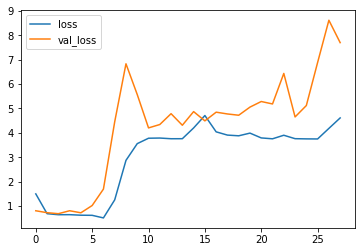

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
predictions = model.predict_classes(test)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(test_target, predictions)

array([[15, 35],
       [ 1, 53]], dtype=int64)

# TRY5

In [ ]:
from keras import Model
from keras.layers import Lambda, Input, Dropout, Flatten, LSTM, Dense

In [ ]:
n_timesteps=60
n_features=4
n_outputs=1

In [ ]:
# Input
x = Input((n_timesteps, n_features))

# LSTM
lstm_1 = LSTM(150, activation='relu', input_shape=(n_timesteps, n_features))(x)
lstm_2 = Dropout(0.5)(lstm_1)
lstm_3 = Dense(150, activation='relu')(lstm_2)
lstm_4 = Dense(n_outputs, activation='softmax', name='lstm_out')(lstm_3)

In [ ]:
model=Model(x, 
           lstm_4,
           name="my_model")

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
min_delta_val = 0.01
lr_cb = ReduceLROnPlateau(monitor = 'val_auc', mode='max', 
                          factor = 0.5, min_delta = min_delta_val, patience = 3, verbose = 1)
es_cb = EarlyStopping(monitor = 'val_auc', mode='max', 
                      min_delta=min_delta_val, patience = 10, verbose = 1, restore_best_weights = True)

default_callbacks = [lr_cb, es_cb]

In [ ]:
train_target

In [ ]:
epochs=200
batch_size=1000
validation_split_on_training = 0.2
# train model
model.fit(train,
          train_target, epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation, validation_target),
          #validation_split=validation_split_on_training,
          verbose=True,
          callbacks=default_callbacks)

In [ ]:
model.history.history

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# TRY6

In [57]:
seq_len

60

In [59]:
train.shape, test.shape

((106, 60, 4), (104, 60, 4))

In [52]:
model = Sequential()
model.add(LSTM(256, input_shape=(seq_len, 4)))
model.add(Dropout(0.5))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(150, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [54]:
adam = Adam(lr=0.01)
chk = ModelCheckpoint('best_model', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(train, train_target, epochs=600, batch_size=32, callbacks=[early_stop], validation_data=(validation,validation_target))

Epoch 1/600
4/4 [==============================] - 2s 393ms/step - loss: 0.7819 - accuracy: 0.4717 - val_loss: 0.6909 - val_accuracy: 0.5962
Epoch 2/600
4/4 [==============================] - 1s 174ms/step - loss: 0.7192 - accuracy: 0.4434 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 3/600
4/4 [==============================] - 1s 173ms/step - loss: 0.7716 - accuracy: 0.5283 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 4/600
4/4 [==============================] - 1s 170ms/step - loss: 0.8342 - accuracy: 0.3962 - val_loss: 0.6853 - val_accuracy: 0.5577
Epoch 5/600
4/4 [==============================] - 1s 175ms/step - loss: 0.7420 - accuracy: 0.5283 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/600
4/4 [==============================] - 1s 173ms/step - loss: 0.7042 - accuracy: 0.5472 - val_loss: 0.7036 - val_accuracy: 0.5000
Epoch 7/600
4/4 [==============================] - 1s 176ms/step - loss: 0.7999 - accuracy: 0.4340 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 8/600
4

In [55]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

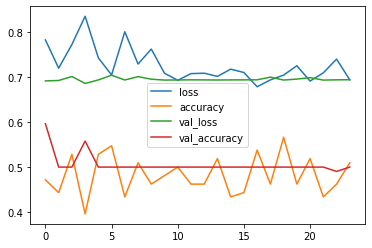

In [56]:
losses.plot()

In [60]:
predictions=model.predict_classes(test)

In [61]:
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(test_target, predictions)

array([[50,  0],
       [54,  0]], dtype=int64)

In [65]:
test1=test[0]

In [74]:
single_test=test1.reshape(1,60,4)

In [78]:
model.predict_classes(single_test)

array([[0]])